
# Exploración de la tabla `competencia_02`

Este notebook analiza la evolución de los indicadores mes a mes y sus diferencias según el tipo de individuo (`target`).  
La tabla fue creada a partir de `competencia_01_crudo` + `competencia_01`.


In [1]:

import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Cargar la tabla competencia_02 en un DataFrame
df = pd.read_csv("competencia_02.csv")

df.head()


,foto_mes,cliente_edad,cliente_antiguedad,active_quarter,ctrx_quarter,cproductos,tcuentas,ccuenta_corriente,ccaja_ahorro,ctarjeta_visa,...,Visa_delinquency,Master_status,Visa_status,Master_msaldototal,Visa_msaldototal,Master_mlimitecompra,Visa_mlimitecompra,Master_mpagominimo,Visa_mpagominimo,target
0,202104,62,72,1,184,8,1,1,2,1,...,0.0,0.0,0.0,0.00,59532.22,964047.64,964047.64,0.00,6228.63,CONTINUA
1,202104,44,27,1,4,8,1,1,2,1,...,0.0,0.0,0.0,0.00,0.00,225216.00,225216.00,0.00,0.00,CONTINUA
2,202104,58,65,1,48,8,1,1,2,1,...,0.0,0.0,0.0,0.00,48103.85,197064.00,281520.00,0.00,4926.60,CONTINUA
3,202104,63,134,1,84,11,1,1,2,1,...,0.0,0.0,0.0,0.00,37649.15,588189.70,585484.66,0.00,1665.66,CONTINUA
4,202104,47,97,1,204,9,1,1,2,1,...,0.0,0.0,0.0,26974.65,2032.63,964047.64,964047.64,1689.12,797.64,CONTINUA


In [2]:

# Info general de la tabla
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650209 entries, 0 to 650208
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   foto_mes                       650209 non-null  int64  
 1   cliente_edad                   650209 non-null  int64  
 2   cliente_antiguedad             650209 non-null  int64  
 3   active_quarter                 650209 non-null  int64  
 4   ctrx_quarter                   650209 non-null  int64  
 5   cproductos                     650209 non-null  int64  
 6   tcuentas                       650209 non-null  int64  
 7   ccuenta_corriente              650209 non-null  int64  
 8   ccaja_ahorro                   650209 non-null  int64  
 9   ctarjeta_visa                  650209 non-null  int64  
 10  ctarjeta_visa_transacciones    650209 non-null  int64  
 11  mtarjeta_visa_consumo          650209 non-null  float64
 12  ctarjeta_master               

In [3]:

# Estadísticas descriptivas básicas
df.describe(include='all')


,foto_mes,cliente_edad,cliente_antiguedad,active_quarter,ctrx_quarter,cproductos,tcuentas,ccuenta_corriente,ccaja_ahorro,ctarjeta_visa,...,Visa_delinquency,Master_status,Visa_status,Master_msaldototal,Visa_msaldototal,Master_mlimitecompra,Visa_mlimitecompra,Master_mpagominimo,Visa_mpagominimo,target
count,650209.000000,650209.000000,650209.000000,650209.000000,650209.000000,650209.000000,650209.000000,650209.000000,650209.000000,650209.000000,...,619050.000000,583911.000000,619050.00000,5.839110e+05,6.190500e+05,5.839110e+05,6.190500e+05,5.839110e+05,6.190500e+05,650209
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,642840
mean,202102.505096,46.813209,133.570959,0.986141,118.900563,7.538501,1.005226,1.002492,2.126827,0.953867,...,0.013190,0.021204,0.02158,1.083918e+04,3.481352e+04,3.855825e+05,3.840034e+05,1.993158e+03,6.436695e+03,NaN
std,1.117804,12.952942,85.774422,0.116904,88.216039,1.485740,0.072102,0.050344,0.472168,0.229679,...,0.114086,0.413625,0.41534,5.178764e+04,6.336047e+04,5.611376e+05,5.037428e+05,2.049300e+04,2.067826e+04,NaN
min,202101.000000,18.000000,1.000000,0.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.00000,-1.256490e+06,-8.024984e+05,9.853200e+02,1.011710e+03,0.000000e+00,0.000000e+00,NaN
25%,202102.000000,37.000000,61.000000,1.000000,60.000000,7.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000e+00,6.217292e+03,9.853200e+04,1.126080e+05,0.000000e+00,5.278500e+02,NaN
50%,202103.000000,45.000000,126.000000,1.000000,105.000000,7.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000e+00,1.856724e+04,1.970640e+05,1.970640e+05,0.000000e+00,2.170050e+03,NaN
75%,202104.000000,56.000000,188.000000,1.000000,158.000000,8.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.00000,6.481555e+03,4.128491e+04,4.855428e+05,4.844079e+05,6.099600e+02,5.712510e+03,NaN


## Evolución mes a mes de algunos indicadores

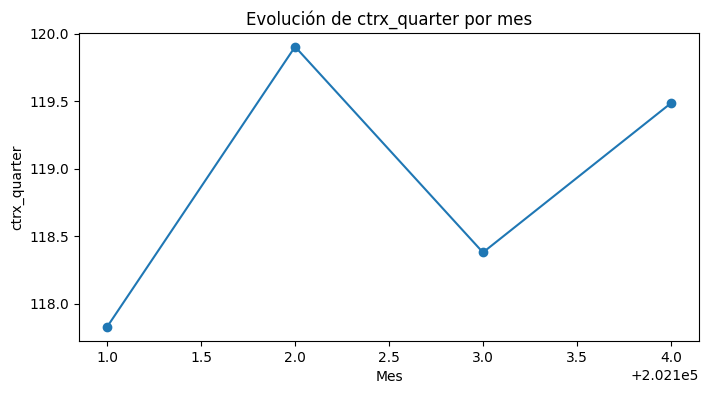

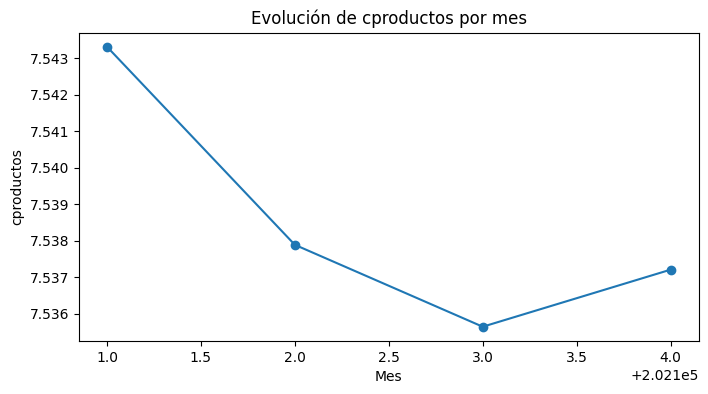

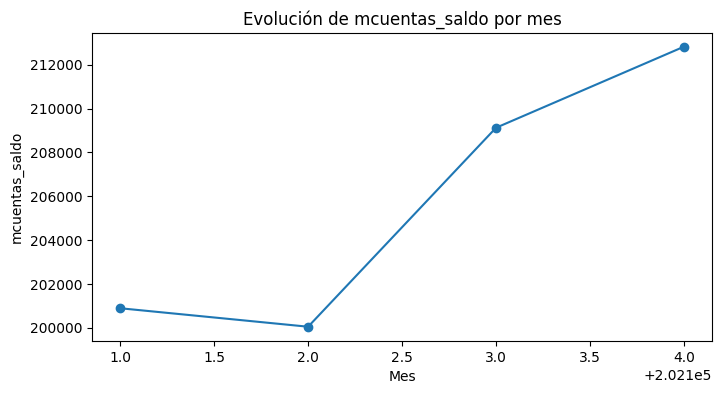

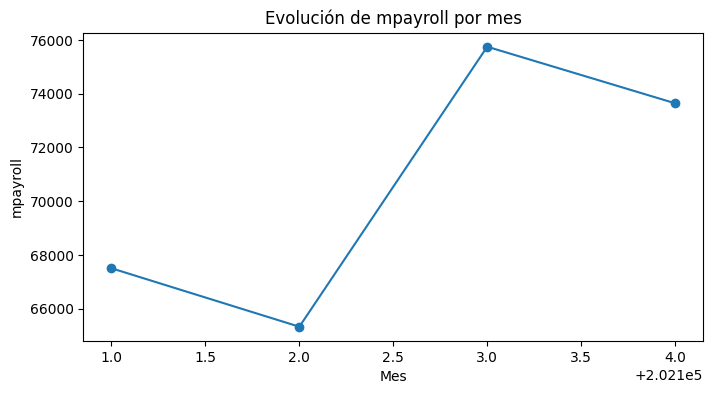

In [4]:

indicadores = ['ctrx_quarter', 'cproductos', 'mcuentas_saldo', 'mpayroll']

for col in indicadores:
    df.groupby('foto_mes')[col].mean().plot(marker='o', figsize=(8,4), title=f"Evolución de {col} por mes")
    plt.xlabel("Mes")
    plt.ylabel(col)
    plt.show()


## Comparación de indicadores según target

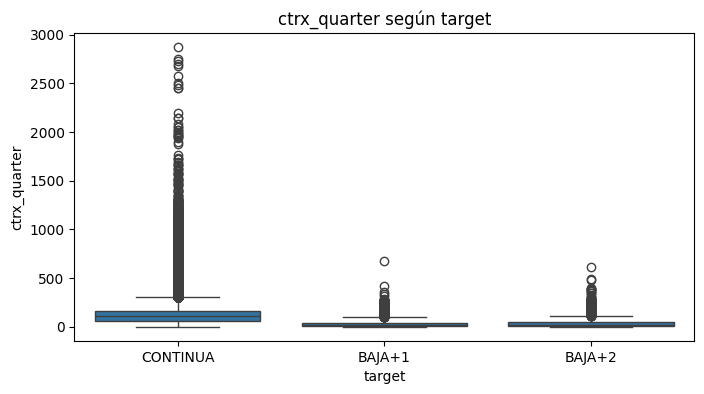

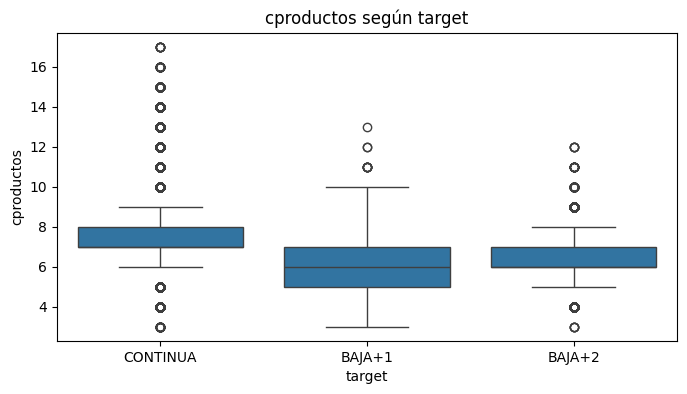

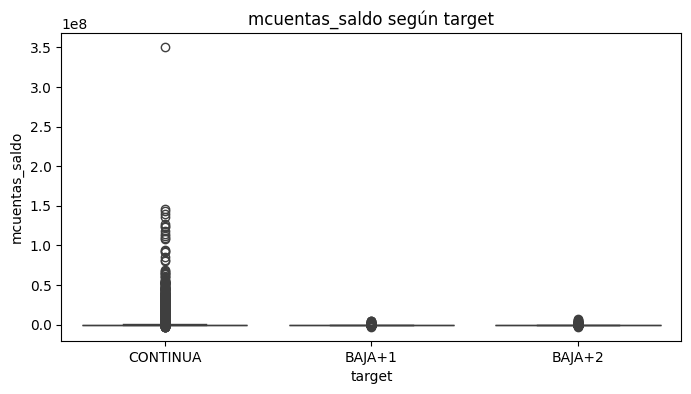

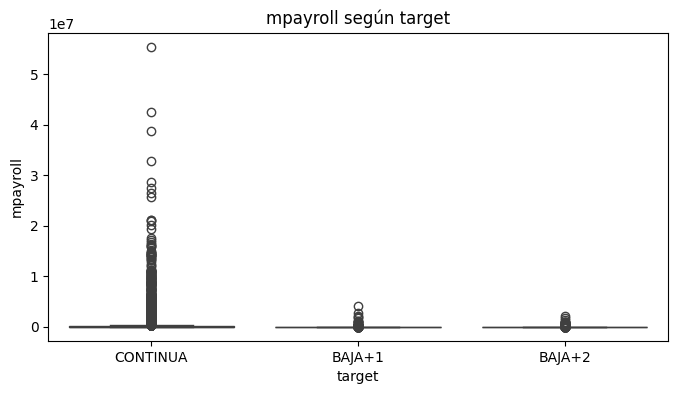

In [5]:

import seaborn as sns

# Distribuciones comparadas
for col in indicadores:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f"{col} según target")
    plt.show()


In [6]:

# Promedios por target y mes
tabla_resumen = df.groupby(['foto_mes', 'target'])[indicadores].mean().reset_index()
tabla_resumen.head(10)


,foto_mes,target,ctrx_quarter,cproductos,mcuentas_saldo,mpayroll
0,202101,BAJA+1,26.641234,6.267857,26520.851120,8871.002094
1,202101,BAJA+2,32.379854,6.383495,17272.427197,5074.295704
2,202101,CONTINUA,118.618795,7.554192,202506.289265,68049.653239
3,202102,BAJA+1,30.640964,6.245783,12463.315506,6828.821976
4,202102,BAJA+2,38.885102,6.494645,30955.650458,6624.172999
5,202102,CONTINUA,120.885713,7.551261,202101.676670,66007.204575
6,202103,BAJA+1,36.804642,6.291103,15487.006393,8917.145938
7,202103,BAJA+2,39.773347,6.482686,37578.219234,9905.059318
8,202103,CONTINUA,119.367306,7.549857,211384.648726,76564.090804
9,202104,BAJA+1,36.807128,6.237945,21107.119350,7247.473742


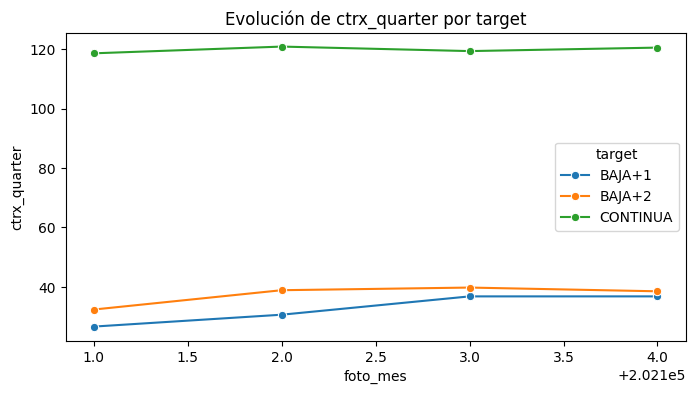

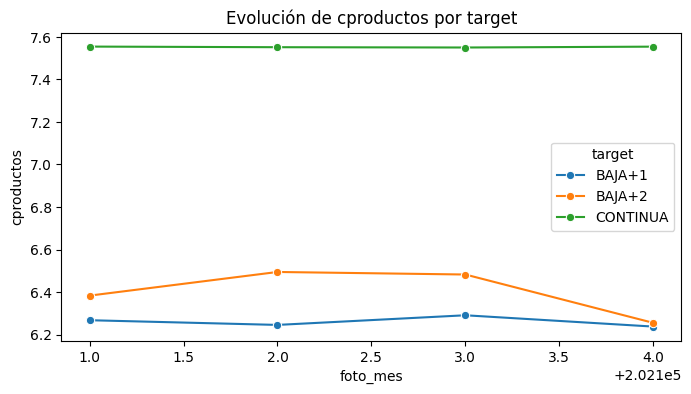

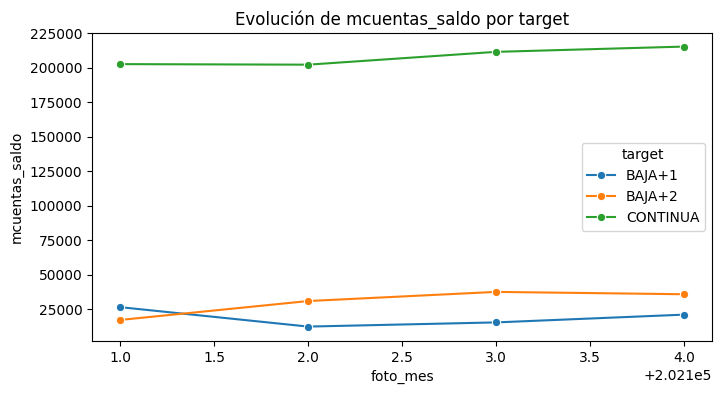

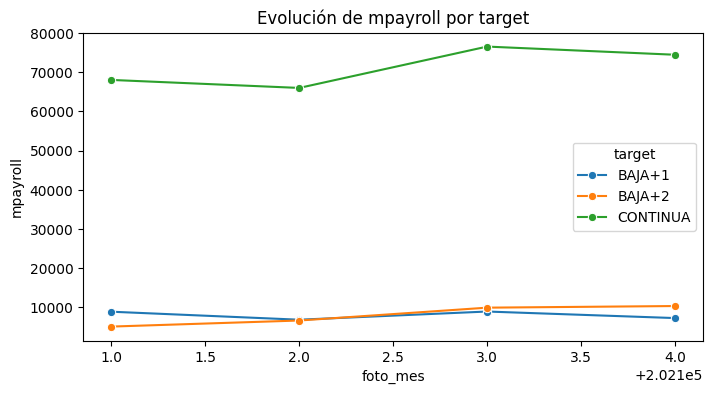

In [7]:

# Evolución por target en gráfico
for col in indicadores:
    plt.figure(figsize=(8,4))
    sns.lineplot(x='foto_mes', y=col, hue='target', data=tabla_resumen, marker='o')
    plt.title(f"Evolución de {col} por target")
    plt.show()
